In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
#build the model 
#the output layers must be a single neuron for regression, we predict a single value
# no activation function
# loss function is MSE
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4875 - val_loss: 0.4656

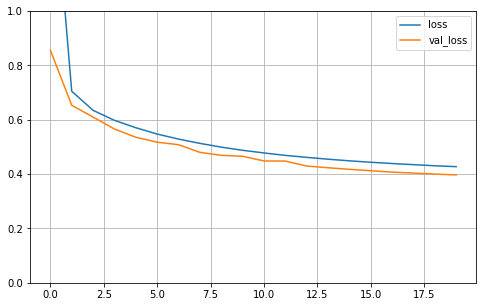

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [6]:
#functional API, a complex model called Wide & Deep by Heng-Tze Cheng
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])
#we pass the precedent model like a function
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_7[0][0]']            

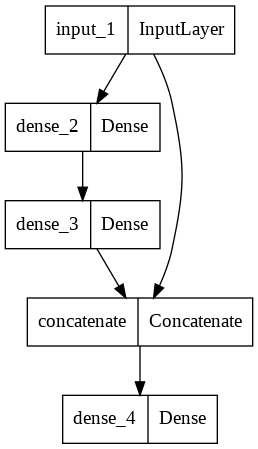

In [ ]:
keras.utils.plot_model(model)

In [7]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8772 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6501 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6012 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5654 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5414 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5181 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5035 - val_loss: 0.5889
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.4690
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4769 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4676 - val_loss: 0.5466

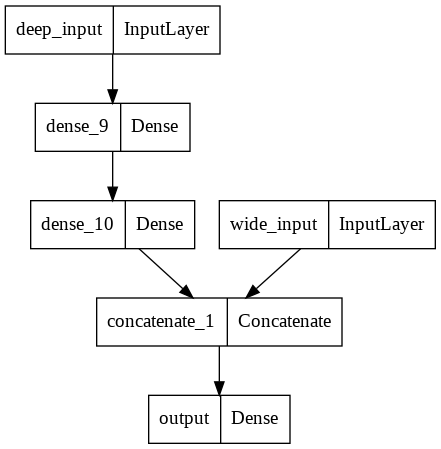

In [8]:
#if we want to send different subsets of input features with different paths? lets send 5 features (0 to 4) to wide path and 6 through deep path (2 to 7)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

keras.utils.plot_model(model)

In [9]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.0090 - val_loss: 0.9850
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7896 - val_loss: 0.7180
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6514 - val_loss: 0.6402
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5991 - val_loss: 0.5778
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5671 - val_loss: 0.5449
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5423 - val_loss: 0.5190
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5228 - val_loss: 0.5011
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5073 - val_loss: 0.4808
Epoch 9/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4945 - val_loss: 0.4661
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4841 - val_loss: 0.4553

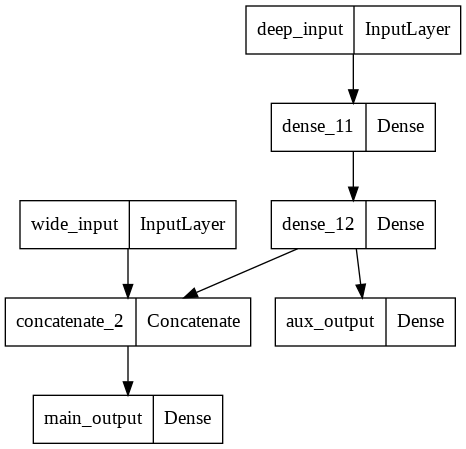

In [10]:
#we want 2 outputs from the model (regression + classification task or indipendent tasks or regularization technique)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

keras.utils.plot_model(model)

In [11]:
#we have to specify 2 loss function or keras will use the same, we can say that
#we care more about the first output than the 2nd with loss_weights
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [12]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.2680 - main_output_loss: 1.9510 - aux_output_loss: 5.1214 - val_loss: 2.7346 - val_main_output_loss: 2.1457 - val_aux_output_loss: 8.0346
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0709 - main_output_loss: 0.8465 - aux_output_loss: 3.0910 - val_loss: 1.5914 - val_main_output_loss: 0.8960 - val_aux_output_loss: 7.8500
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8526 - main_output_loss: 0.7034 - aux_output_loss: 2.1957 - val_loss: 1.2902 - val_main_output_loss: 0.6649 - val_aux_output_loss: 6.9176
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7558 - main_output_loss: 0.6404 - aux_output_loss: 1.7942 - val_loss: 1.1200 - val_main_output_loss: 0.6066 - val_aux_output_loss: 5.7407
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6982 - main_output_loss: 0.5992 - aux_output_loss: 1.5896 - val_loss

In [13]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 1s 5ms/step - loss: 0.4880 - main_output_loss: 0.4318 - aux_output_loss: 0.9943


In [14]:
# subclassing API to build dynamic models
class WideAndDeep(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs) #handles standard args like name
    self.hidden1 = keras.layers.Dense(units, activation= activation)
    self.hidden2 = keras.layers.Dense(units, activation= activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
  
  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeep(30, activation='relu')


In [15]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 2.1210 - output_1_loss: 1.9986 - output_2_loss: 3.2225 - val_loss: 2.8539 - val_output_1_loss: 2.5208 - val_output_2_loss: 5.8515
Epoch 2/10
363/363 [==============================] - 3s 7ms/step - loss: 0.9263 - output_1_loss: 0.7926 - output_2_loss: 2.1300 - val_loss: 1.5743 - val_output_1_loss: 1.2249 - val_output_2_loss: 4.7190
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.7806 - output_1_loss: 0.6730 - output_2_loss: 1.7492 - val_loss: 1.1348 - val_output_1_loss: 0.8106 - val_output_2_loss: 4.0528
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7027 - output_1_loss: 0.6126 - output_2_loss: 1.5139 - val_loss: 0.9375 - val_output_1_loss: 0.6529 - val_output_2_loss: 3.4992
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6474 - output_1_loss: 0.5703 - output_2_loss: 1.3416 - val_loss: 0.7974 - val_output_1_loss: 0.5528 - val_ou

In [16]:
#saving and restoring a model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.7708 - val_loss: 0.7858
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7263 - val_loss: 0.6888
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6499 - val_loss: 0.6225
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6047 - val_loss: 0.5610
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5699 - val_loss: 0.5240
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5404 - val_loss: 0.4974
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5160 - val_loss: 0.4785
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4574
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4784 - val_loss: 0.4423
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4448


In [17]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

array([[0.7777176],
       [1.5822685],
       [3.3043728]], dtype=float32)

In [18]:
#using callbacks
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

#save only the best parameters that perform better on validation, simple early stop
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 4s 10ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4382


In [19]:
#early stopping
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 7s 15ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3976 - val_l

In [20]:
#custom control
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

354/363 [============================>.] - ETA: 0s - loss: 0.3286
val/train: 1.08
363/363 [==============================] - 3s 9ms/step - loss: 0.3302 - val_loss: 0.3561


In [25]:
#use tensorboard for visualization
import os
import time
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
print(run_logdir)

./my_logs/run_2022_04_06-16_57_12


In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 3s 8ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 2s 7ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [36]:
#run tensorboard on jupyter
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
%reload_ext tensorboard
%tensorboard --logdir=./content/my_logs --port=6008

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
2022-04-06 17:06:28.067120: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

E0406 17:06:28.543416 139713471588224 program.py:298] TensorBoard could not bind to port 6008, it was already in use
ERROR: TensorBoard could not bind to port 6008, it was already in use

In [37]:
%load_ext tensorboard
%tensorboard --logdir logs
#doesn't work on colab

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

In [38]:
run_logdir2 = get_run_logdir()
run_logdir2

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5765 - val_loss: 4.8654
Epoch 2/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5506 - val_loss: 2.4561
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4120 - val_loss: 0.3365
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3650 - val_loss: 0.3776
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3574 - val_loss: 0.3306
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3441 - val_loss: 0.3182
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3386 - val_loss: 0.3191
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3321 - val_loss: 0.3063
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3247 - val_loss: 0.2994
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3210 - val_loss: 0.3145

In [39]:
#hyperparameter tuning
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


363/363 [==============================] - 2s 4ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_loss: 0.4071


In [40]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

#Warning: the following cell crashes at the end of training. This seems to be caused by Keras issue #13586, which was triggered by a recent change in Scikit-Learn. Pull Request #13598 seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added .tolist() and .rvs(1000).tolist() as workarounds.
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.score(X_test, y_test))
model = rnd_search_cv.best_estimator_.model
print(model)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3346
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7861 - val_loss: 0.4686
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4791 - val_loss: 0.4998
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4595 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4497 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4455 - val_loss: 0.5519
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4427 - val_loss: 0.4784
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4468 - val_loss: 0.5038
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4394 - val_loss: 0.6504
Epoch 9/100
242/242 [==============================] - 1s 2ms

0.28699493408203125